In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Step 2: Upload the dataset (Option 1: Code upload)
#from google.colab import files
#uploaded = files.upload()


In [6]:
# Step 3: Load the Dataset
data = pd.read_csv("/content/Advertising_2.csv")


In [7]:
# Drop the unnecessary column
if "Unnamed: 0" in data.columns:
    data = data.drop(columns=["Unnamed: 0"])

In [8]:
# Step 4: Explore Dataset
print("First 5 rows:\n", data.head())
print("\nDataset Info:\n")
print(data.info())
print("\nSummary Statistics:\n", data.describe())

First 5 rows:
       TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Summary Statistics:
                TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000 

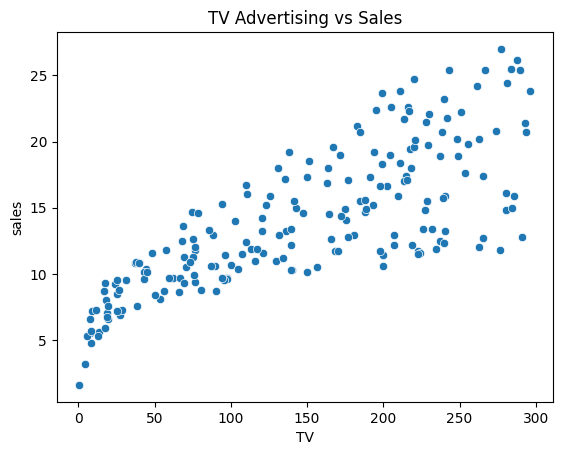

In [9]:
# Scatter plot (TV vs Sales)
sns.scatterplot(x=data['TV'], y=data['sales'])
plt.title("TV Advertising vs Sales")
plt.show()


In [10]:
# Step 5: Prepare Data
X = data[['TV']]       # Independent variable
y = data['sales']      # Dependent variable


In [11]:
# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Step 6: Build Model
model = LinearRegression()
model.fit(X_train, y_train)

# Print slope and intercept
print("Slope (m):", model.coef_)
print("Intercept (c):", model.intercept_)


Slope (m): [0.04652973]
Intercept (c): 7.119638430592953


In [13]:
# Step 7: Predictions
y_pred = model.predict(X_test)

In [14]:
# Step 8: Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [15]:
print("\nModel Evaluation:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Model Evaluation:
Mean Absolute Error (MAE): 2.444420003751042
Mean Squared Error (MSE): 10.204654118800956
Root Mean Squared Error (RMSE): 3.194472431998898
R² Score: 0.6766954295627076


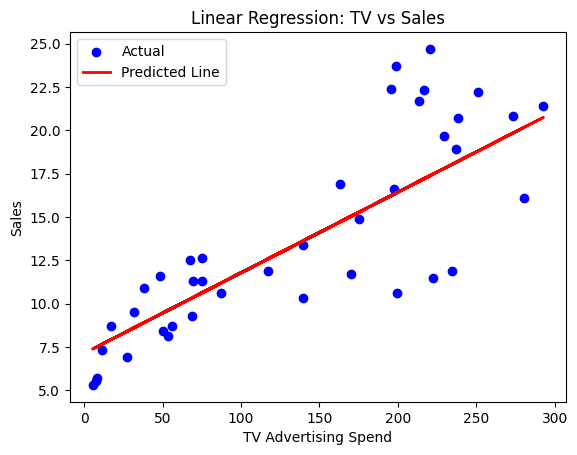

In [16]:
# Step 9: Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.xlabel("TV Advertising Spend")
plt.ylabel("Sales")
plt.title("Linear Regression: TV vs Sales")
plt.legend()
plt.show()